# Prediction Using Supervised ML Algorithm

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing the data and creating pandas dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported Successfully")
df.head(10)

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


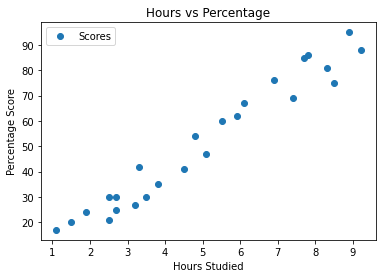

In [5]:
#visualising our dataframe
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
#Preparing our data and segregating into features and labels
X= df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [7]:
#Dividing our data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2, random_state=42)

In [8]:
#Initialising Linera Regression model and fitting our dataset
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training coomplete")

Training coomplete


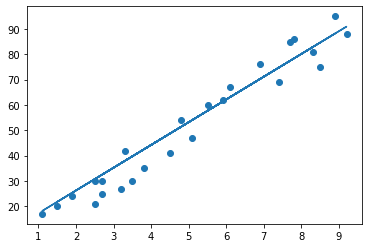

In [9]:
# Plotting the line of best fit
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
#Predicting the scores
y_pred = lr.predict(X_test)
y_pred

array([82.84148209, 30.74686128, 30.74686128, 70.26691844, 61.28508727,
       32.54322752, 37.93232622, 54.09962233, 42.42324181, 21.76503011,
       37.03414311, 48.71052363, 88.23058079, 84.63784832, 39.72869246,
       32.54322752, 25.35776258, 51.40507298, 63.08145351, 78.3505665 ])

In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,82.841482
1,30,30.746861
2,21,30.746861
3,76,70.266918
4,62,61.285087
5,25,32.543228
6,42,37.932326
7,47,54.099622
8,35,42.423242
9,20,21.765030


In [15]:
#predicting for a specific time value
hours = np.array([9.25])
new_pred = lr.predict(hours.reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [9.25]
Predicted Score = 91.37422170052056


In [17]:
#Evaluating our model accuracy
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.431325916096766
